In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("german_credit_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [75]:
# Handle missing values
df["Saving accounts"].fillna("Unknown", inplace=True)
df["Checking account"].fillna("Unknown", inplace=True)

# Encode categorical columns
cat_cols = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose"]
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Save PCA
with open("pca.pkl", "wb") as f:
    pickle.dump(pca, f)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_data)

# Save KMeans model
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)


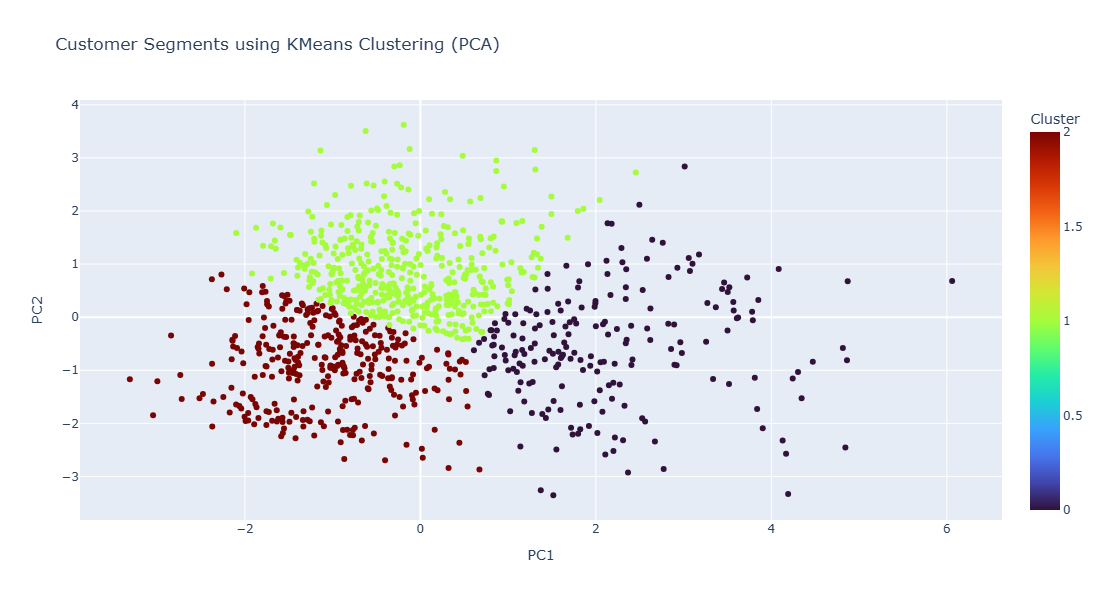

In [77]:
import plotly.express as px

fig = px.scatter(
    pca_df,
    x='PC1',
    y='PC2',
    color='Cluster',
    title='Customer Segments using KMeans Clustering (PCA)',
    color_continuous_scale='Turbo',
    width=900,
    height=600
)
fig.show()

## Cluster 0 (Blue):
Likely represents customers with moderate behavior — balanced between risk and credit usage.

They’re neither extreme defaulters nor the best payers.

## Cluster 1 (Green):
Likely the safe zone: customers with good financial habits.

May have high savings, responsible credit history, etc.

## Cluster 2 (BROWN):
Might represent high-risk customers — heavy credit use, lower savings, possible default patterns.

These are critical to monitor in real-world applications.

In [73]:
import joblib
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca_model.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']